In [14]:
import importlib
import my_tree
importlib.reload(my_tree)
import pandas as pd
from sklearn.model_selection import train_test_split
import time
from sklearn.model_selection import StratifiedKFold


df = pd.read_csv('/Users/dashabalashova/1_1_5_ML_Bioinf/data/cancer.csv')
df['label'] = df['label'].map({'M':1, 'B':0})
train_df, validate_df = train_test_split(df, test_size=0.2, stratify=df.label)


In [15]:
prediction_array = validate_df[['label']]
N = 20
for i in range(0, N):
    tree = my_tree.make_tree(df = train_df, I_type = 'gini', depth = 3, var_proportion = 0.1)
    df_prediction = my_tree.tree_impl(df = validate_df, tree = tree, depth = 3)
    prediction_array = pd.concat([prediction_array, df_prediction], axis=1)

ROC AUC = 0.9927248677248678


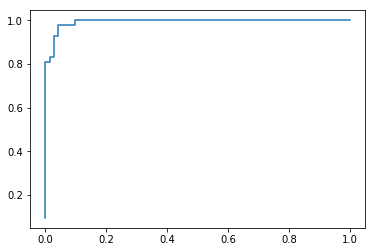

In [16]:
import matplotlib.pyplot as plt
from operator import itemgetter


auc, R = my_tree.auc(prediction_array, N)
print('ROC AUC =', auc)
plt.figure()
plt.plot(list(zip(*R))[0], list(zip(*R))[1])
plt.show()